<a href="https://colab.research.google.com/github/aluqbnle/ml-sandbox/blob/master/04_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from pandas import DataFrame
from sklearn.datasets import load_breast_cancer

In [0]:
breast_cancer =load_breast_cancer()
X = breast_cancer.data[:,:10]
y = breast_cancer.target

columns=['半径', 'テクスチャ', '周囲の長さ', '面積', 'なめらかさ', 'コンパクト性', 'へこみ', 'へこみの数', '対称性', 'フラクタル次元']
df=DataFrame(data=X[:,:10],columns=columns)
df['目的変数'] = y

In [0]:
X = df[['面積','へこみ']].values
y=df['目的変数'].values

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [0]:
from sklearn.preprocessing import StandardScaler

In [19]:
#StandardScalerのインスタンスを作成する
sc=StandardScaler()
# 訓練データの平均と標準偏差を計算する
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
#訓練データの標準化
X_train_std =sc.transform(X_train)

#テストデータの標準化
#テストデータの訓練データの平均化と標準偏差を用いて変換する
X_test_std =sc.transform(X_test)

In [0]:
from sklearn.linear_model import SGDClassifier

In [0]:
lr = SGDClassifier(loss='log', alpha=0.0001, learning_rate='constant', eta0=0.1, shuffle=True, max_iter=1000, random_state=42)

In [23]:
lr.fit(X_train_std, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.1, fit_intercept=True,
       l1_ratio=0.15, learning_rate='constant', loss='log', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [24]:
# テストデータの予測
pred=lr.predict(X_test_std)
# 予測の確認
print(pred)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1]


In [0]:
# 確率(パーセプトロンでは取得できない)
proba = lr.predict_proba(X_test_std)

In [27]:
proba[0]

array([0.1251407, 0.8748593])

In [0]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test,pred)

0.935672514619883

In [43]:
!pip install japanize-matplotlib

    100% |████████████████████████████████| 4.1MB 1.2MB/s 
  Running setup.py bdist_wheel for japanize-matplotlib ... - \ done
  Stored in directory: /root/.cache/pip/wheels/47/d1/ba/1a686af7cc042edde2c2f4cb18bd981f7eefdcbfe688590d25
Successfully built japanize-matplotlib


In [0]:
import numpy
from matplotlib import pyplot
pyplot.rcParams['font.family']= 'IPAPGothic'
from mlxtend.plotting import plot_decision_regions
import japanize_matplotlib

In [0]:
# すべてのデータをプロットすると多すぎるので制限する
N=100
# 訓練データとテストデータからN個ずつのサンプルを先頭から撮ってくる
sampled_X=numpy.vstack((X_train_std[:N],X_test_std[:N]))
sampled_y=numpy.hstack((y_train[:N],y_test[:N]))

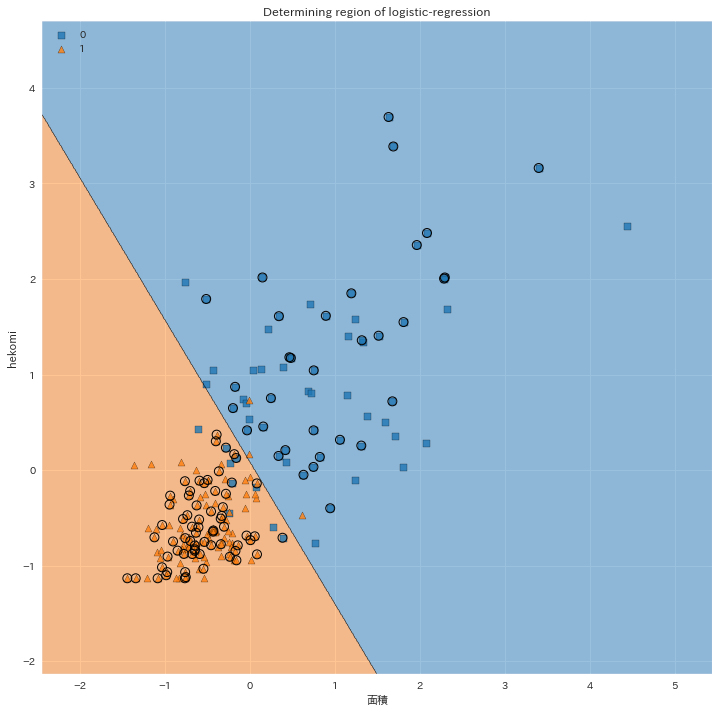

In [46]:
pyplot.figure(figsize=((12,12)))
pyplot.xlabel("面積")
pyplot.ylabel("hekomi")
pyplot.title("Determining region of logistic-regression")
# 決定領域のプロット
plot_decision_regions(sampled_X,sampled_y,clf=lr,legend=2,X_highlight=X_test_std[:N])